In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATA

In [49]:
df_sub = pd.read_csv("Data/sample_submission.csv")
df_sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [50]:
df_train = pd.read_csv('Data/train.csv')
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [51]:
df_test = pd.read_csv('Data/test.csv')
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


**No Null values in any of the features.**

# UNNECESARY FEATURES

In [54]:
df_train = df_train.drop('id', axis=1)
df_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [55]:
df_test = df_test.drop('id', axis=1)
df_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
39093,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


# EDA

In [56]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


**Possible outlier detected in the feature ‘person_age’**, having a maximum age of 123 years (compared to 94 in the test block).

*Later, when looking at the correlation of the features to the label, it is seen how 'person_age' has little influence over it. Therefore, I am not considering its outliers.*

In [57]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,39098.0,27.566781,6.032761,20.00,23.00,26.00,30.00,94.00
person_income,39098.0,64060.460842,37955.828705,4000.00,42000.00,58000.00,75885.00,1900000.00
person_emp_length,39098.0,4.687068,3.868395,0.00,2.00,4.00,7.00,42.00
loan_amnt,39098.0,9251.466188,5576.254680,700.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,39098.0,10.661216,3.020220,5.42,7.88,10.75,12.99,22.11
loan_percent_income,39098.0,0.159573,0.091633,0.00,0.09,0.14,0.21,0.73
cb_person_cred_hist_length,39098.0,5.830707,4.072157,2.00,3.00,4.00,8.00,30.00


It can also be seen how the maximum of the test for the feature person_emp_length is much higher in the train block, **so I'll have to see if there are enough samples around the test maximum in the df_train**.

*Later, when looking at the correlation of the features to the label, it is seen how 'person_age' has little influence over it. Therefore, I am not considering this difference.*

## Relevant plotting

In [58]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


The relation between the 'person_age' and 'person_income' may be of interest.

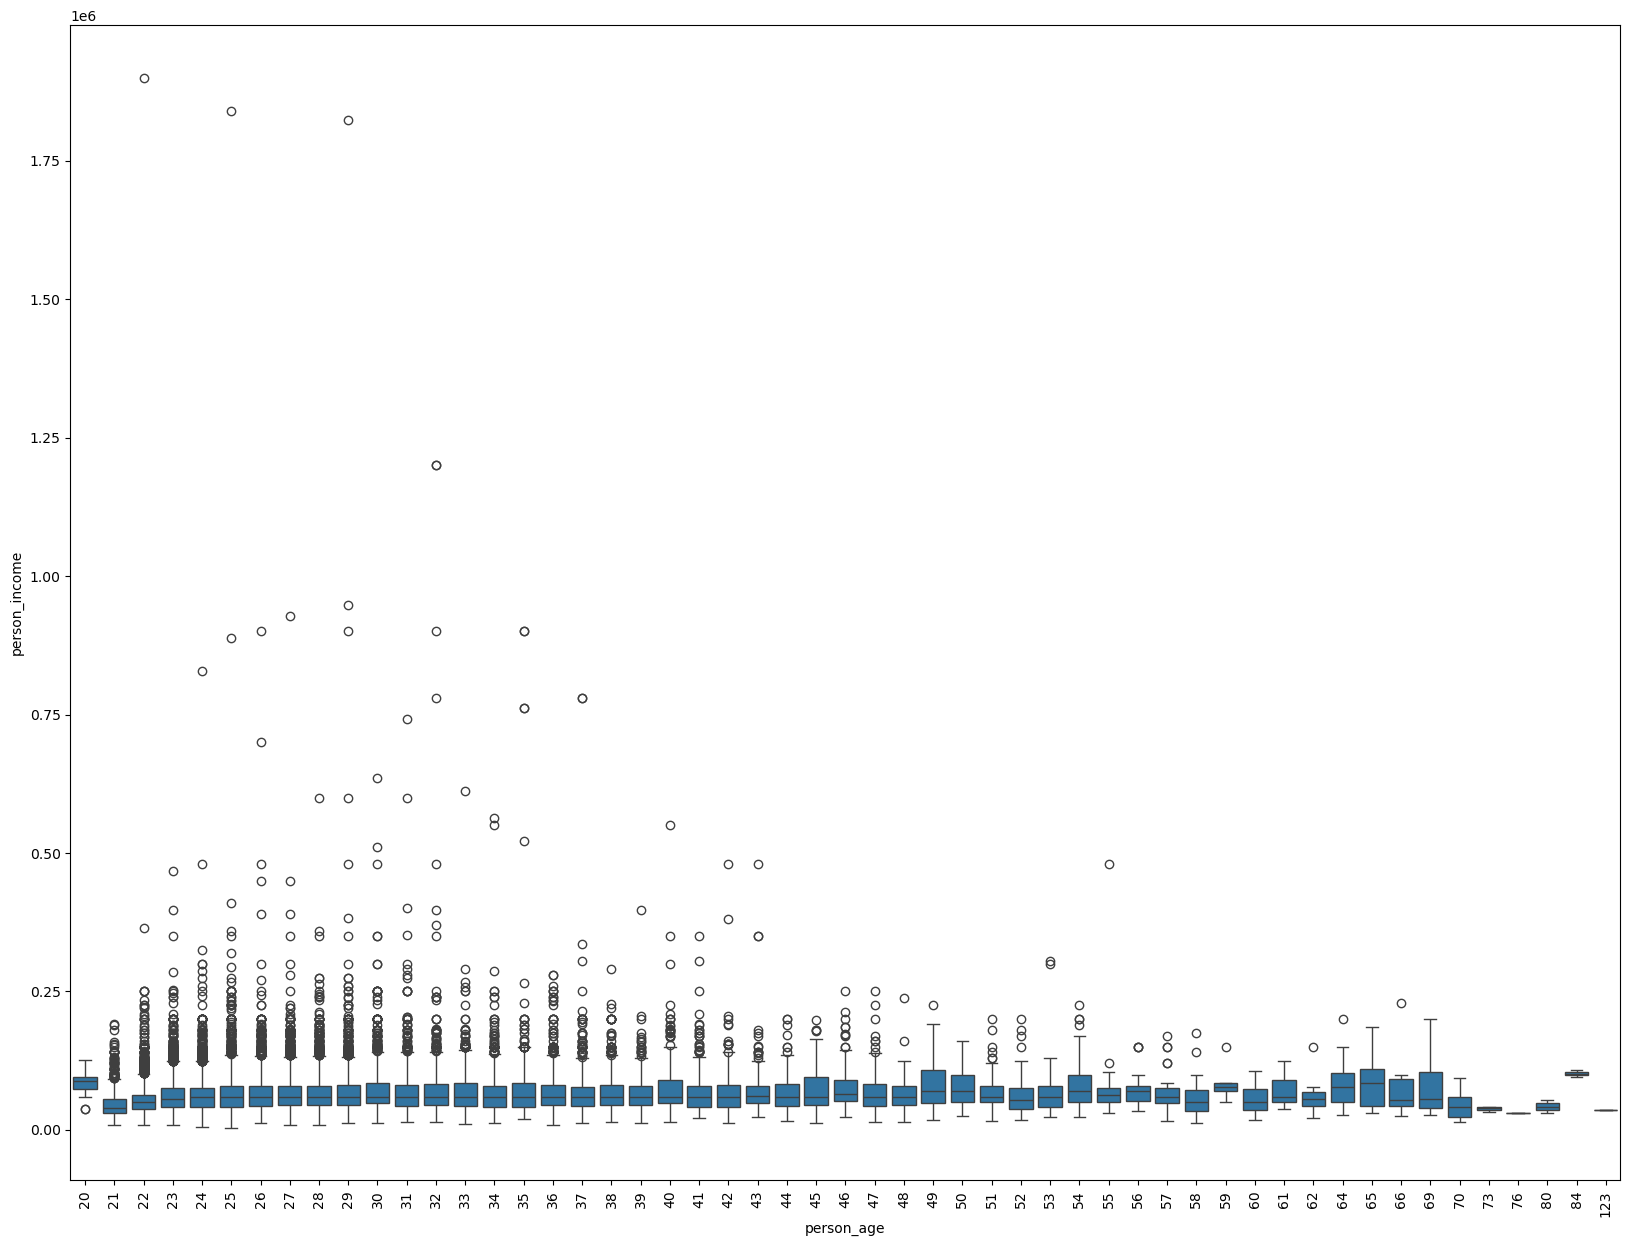

In [59]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df_train, y="person_income", x="person_age")
plt.xticks(rotation=90);

Data shows an ilogical behaviour, since it was expected that the older the person, the higher the income, but happens almost the opposite,
as higher incomes (higher than 125.000$, which may be considered as rich) appear in lower ages as outliers. This may be since the data is synthetical.

Let's zoom in to see the tendencies of the average salaries.

(0.0, 125000.0)

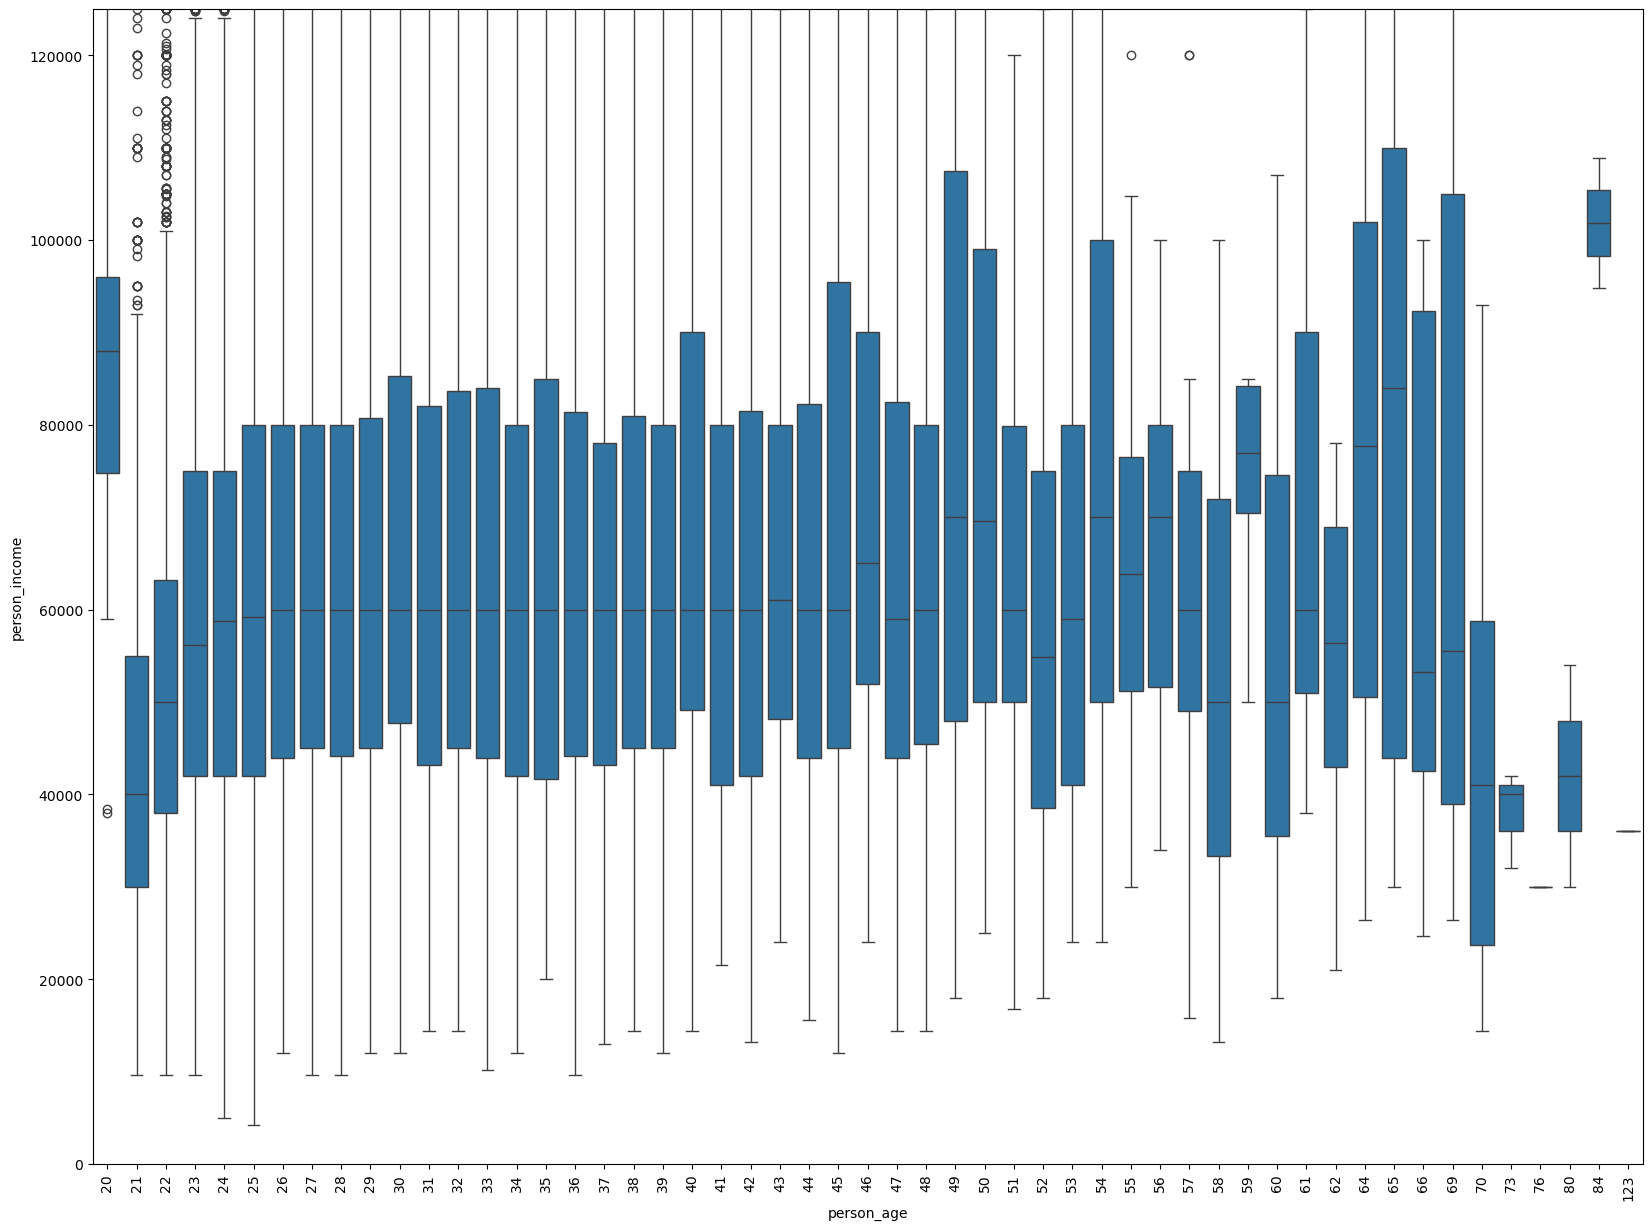

In [60]:
plt.figure(figsize=(20,15))
axes = sns.boxplot(data=df_train, y="person_income", x="person_age")
plt.xticks(rotation=90);
axes.set_ylim([0, 0.125e6])

A slight tendency up can be perceived, but nothing close determining.

Also seeing the main income values.

(0.0, 250000.0)

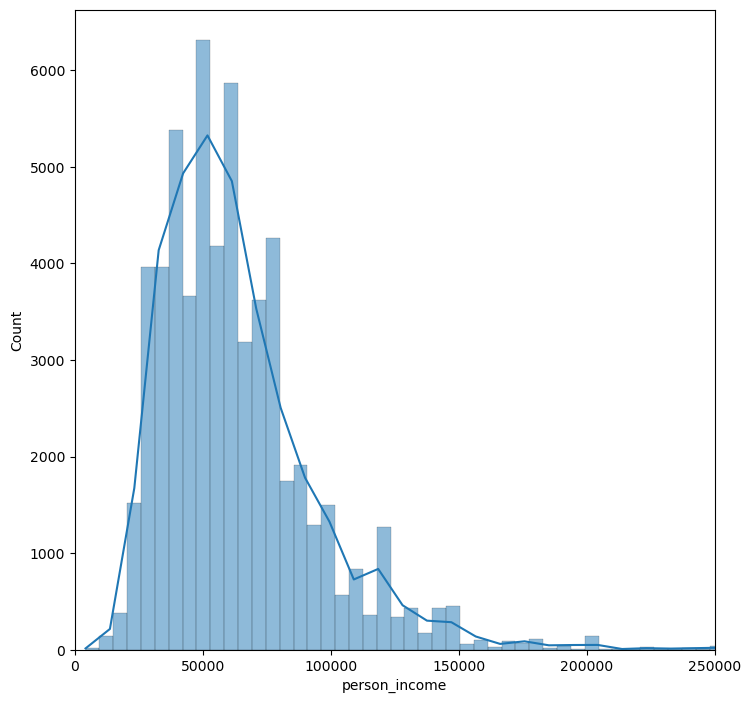

In [61]:
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 0.8, 0.8])
sns.histplot(df_train['person_income'], kde=True, bins=350)
axes.set_xlim([0, 0.25e6])

Could be useful to change the scale of the feature to logarithmic, since the values are too disperse. **I will try with normal scale and log scale.**

<Axes: xlabel='person_income', ylabel='Count'>

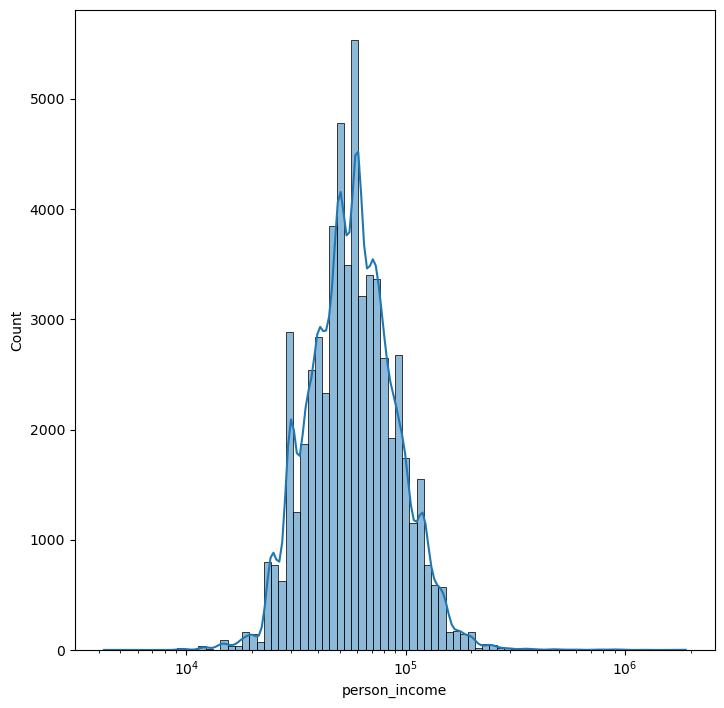

In [62]:
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 0.8, 0.8])
sns.histplot(df_train['person_income'], kde=True, bins=80, log_scale=True)

(0.0, 50.0)

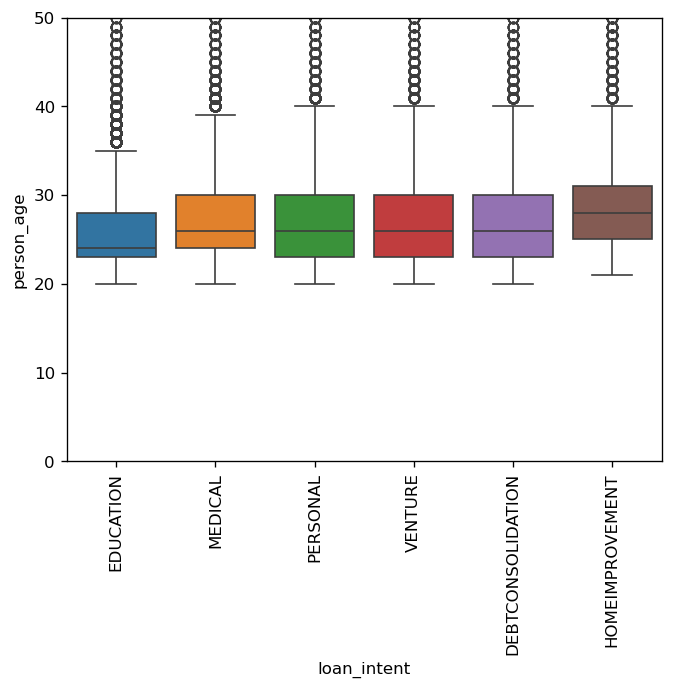

In [63]:
plt.figure(dpi=120)
axes = sns.boxplot(data=df_train, x='loan_intent', y='person_age', hue='loan_intent')
plt.xticks(rotation=90);
axes.set_ylim([0, 50])

## Balanced Label

In [64]:
df_train['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

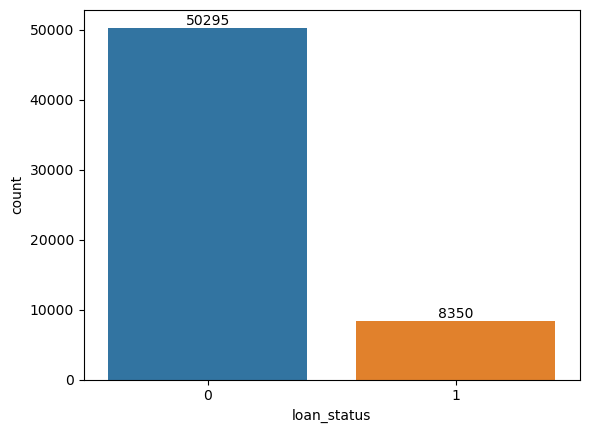

In [65]:
ax = sns.countplot(x=df_train['loan_status'], hue=df_train['loan_status'], legend=False)

for i, v in enumerate(df_train['loan_status'].unique()):
    ax.bar_label(ax.containers[i])

Label is imbalanced, therefore accuracy is not a valid metric and **I will apply stratification** to mantain proportion on the folds.

The imbalance is of the order of 6 to 1, therefore **I will consider it given the final metrics are not good**.

## Unique Values

In [66]:
df_train.nunique()

person_age                      53
person_income                 2641
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      545
loan_int_rate                  362
loan_percent_income             61
cb_person_default_on_file        2
cb_person_cred_hist_length      29
loan_status                      2
dtype: int64

In [67]:
df_test.nunique()

person_age                      52
person_income                 2196
person_home_ownership            4
person_emp_length               31
loan_intent                      6
loan_grade                       7
loan_amnt                      482
loan_int_rate                  336
loan_percent_income             63
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [68]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [69]:
df_train["cb_person_default_on_file"].unique()

array(['N', 'Y'], dtype=object)

In [70]:
df_train["loan_intent"].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [71]:
df_train["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

## Correlation

In [72]:
from dython.nominal import associations

In [73]:
associations_df = associations(df_train, nominal_columns="all", plot=False)
corr_matrix = associations_df['corr']

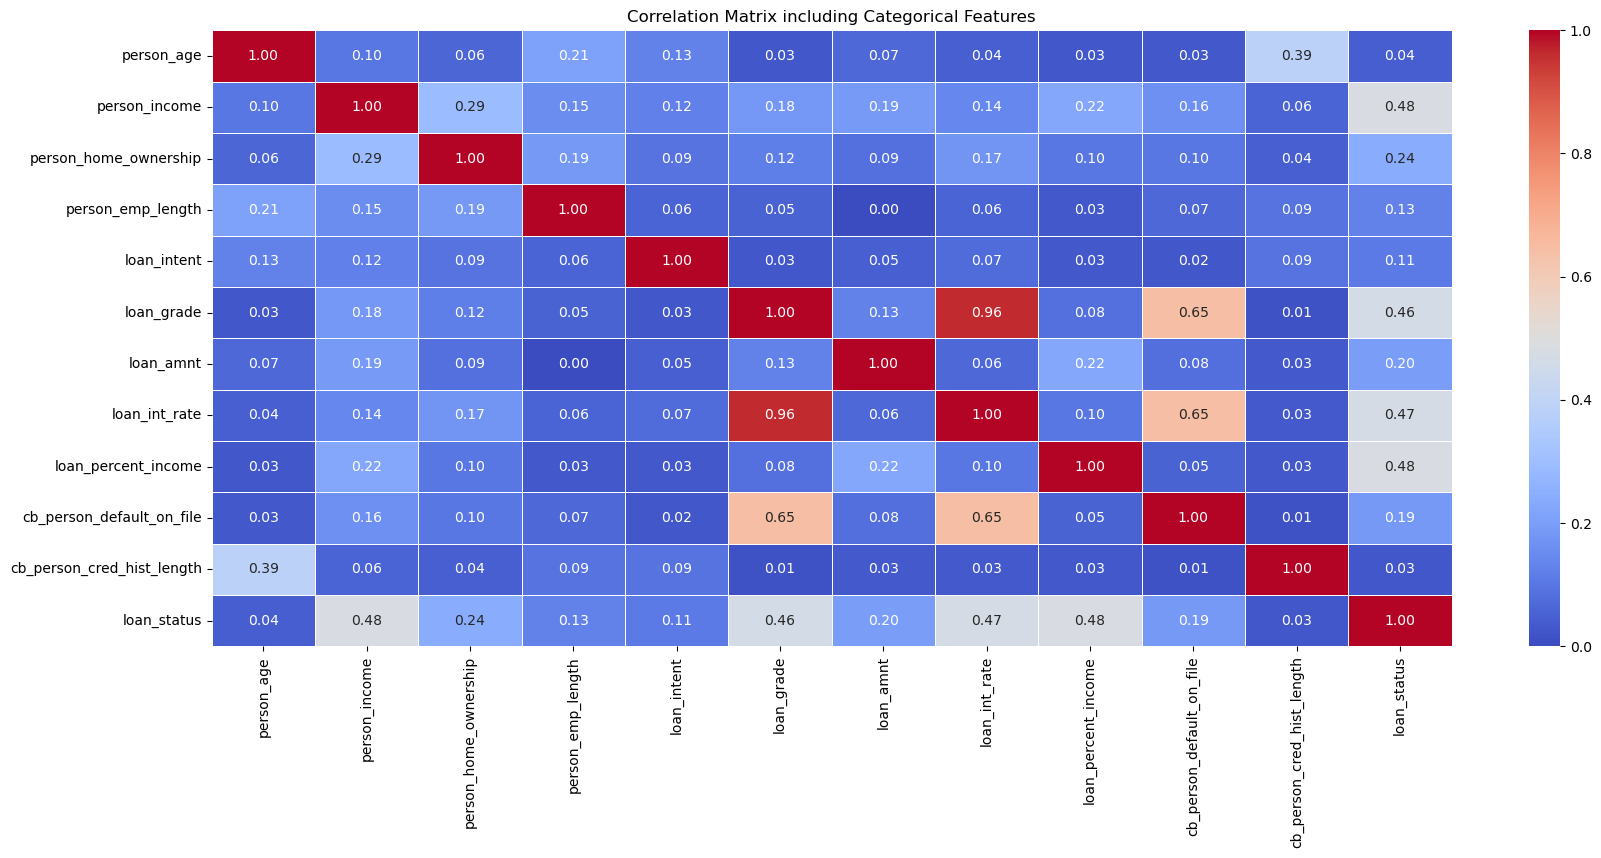

In [74]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [75]:
corr_matrix["loan_status"].sort_values(ascending=False)

loan_status                   1.000000
person_income                 0.483828
loan_percent_income           0.481889
loan_int_rate                 0.469528
loan_grade                    0.461133
person_home_ownership         0.241564
loan_amnt                     0.196051
cb_person_default_on_file     0.186849
person_emp_length             0.127847
loan_intent                   0.105702
person_age                    0.041450
cb_person_cred_hist_length    0.027181
Name: loan_status, dtype: float64

It is shown how 'person_income', 'loan_percent_income', 'loan_int_rate' and 'loan_grade' have the highest correlation to the label.

# FEATURE ENGINEERING

## Duplicates

In [76]:
print("Number of duplicates in train data: ", len(df_train[df_train.duplicated()]))

Number of duplicates in train data:  0


In [77]:
print("Number of duplicates in test data: ", len(df_test[df_test.duplicated()]))

Number of duplicates in test data:  0


## Outliers

<Axes: xlabel='loan_status', ylabel='person_income'>

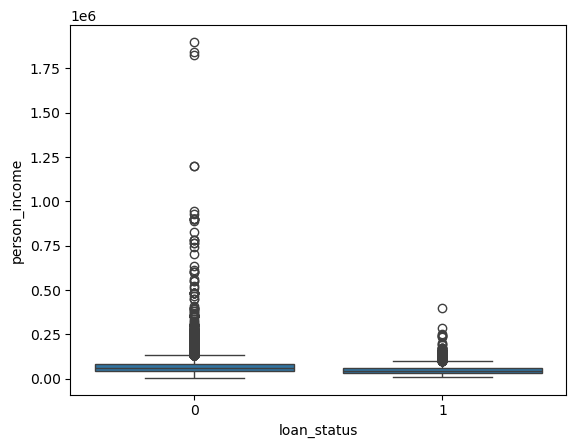

In [78]:
sns.boxplot(data=df_train, x="loan_status", y="person_income")

By looking at this plot, it can be presummed (but not determined) that in 'loan_status' "0" means approved (since it is what higher incomes have), and "1" means not-approved.

Regarding outliers, higher 'person_income' values are way out of the main values, but they may serve the model as to classify these higher incomes as approved or "0", **so I will leave them and see the final metrics**.

(0.0, 400000.0)

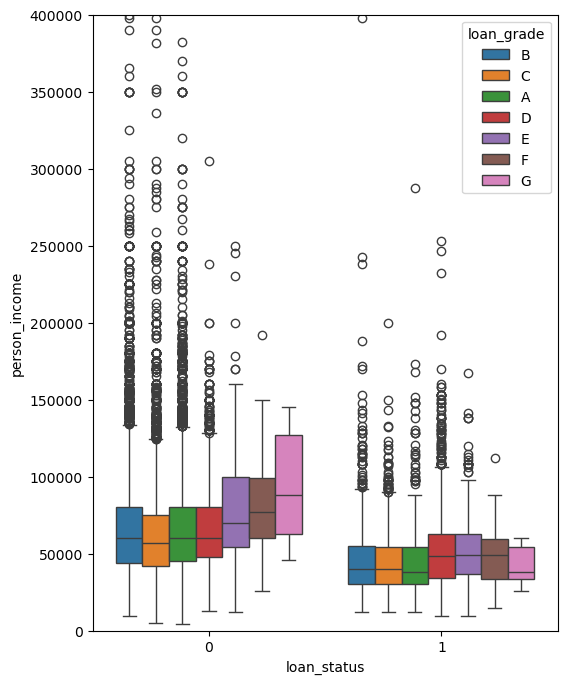

In [79]:
plt.figure(figsize=(6, 8))
axes = sns.boxplot(data=df_train, x="loan_status", y="person_income", hue="loan_grade")
axes.set_ylim([0, 0.4e6])

By looking at this plot it can be presummed that higher 'loan_grade' it's related to higher income.

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

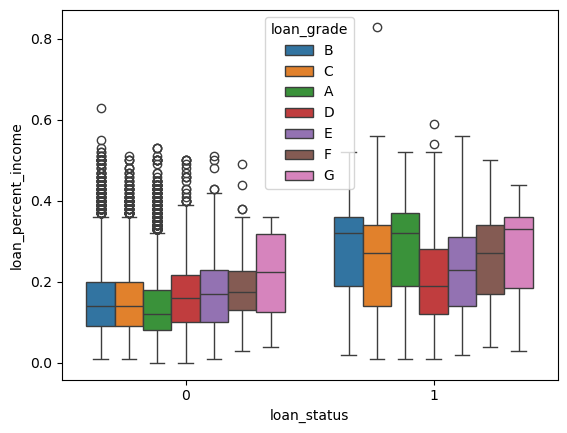

In [80]:
sns.boxplot(data=df_train, x="loan_status", y="loan_percent_income", hue="loan_grade")

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

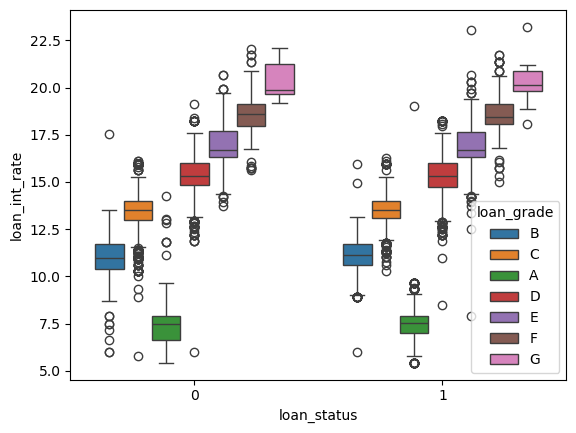

In [81]:
sns.boxplot(data=df_train, x="loan_status", y="loan_int_rate",  hue="loan_grade")

It can be determined that higher 'loan_grade' means higher 'loan_int_rate'.

In [82]:
hue_order = np.sort(df_train["loan_grade"].unique())
hue_order

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

(0.0, 400000.0)

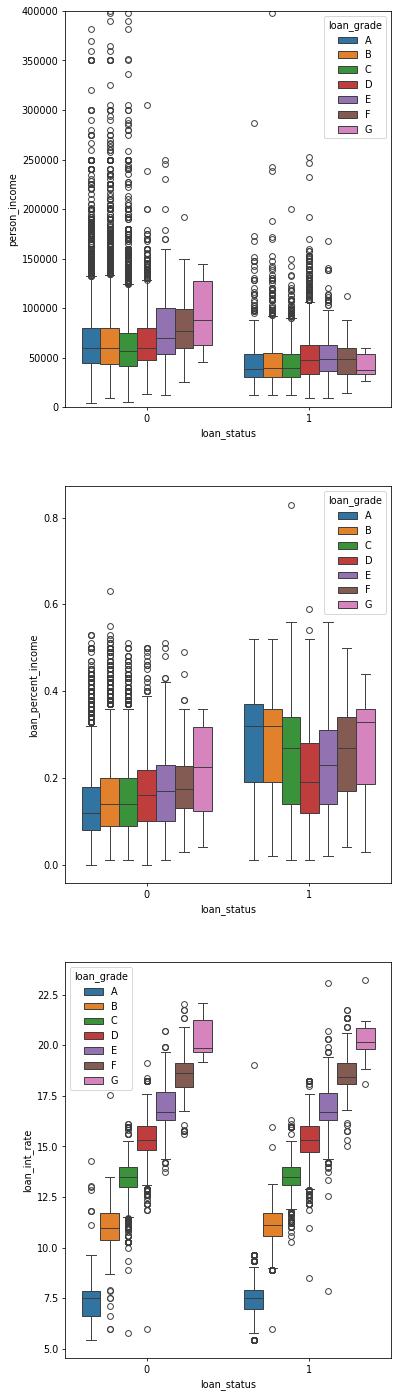

In [83]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 25), dpi=70)
sns.boxplot(ax=axes[2], data=df_train, x="loan_status", y="loan_int_rate",  hue="loan_grade", hue_order=hue_order)
sns.boxplot(ax=axes[1], data=df_train, x="loan_status", y="loan_percent_income", hue="loan_grade", hue_order=hue_order)
sns.boxplot(ax=axes[0], data=df_train, x="loan_status", y="person_income", hue="loan_grade", hue_order=hue_order)
axes[0].set_ylim([0, 0.4e6])

## Enconding

In [84]:
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


I will use One-Hot Encoding since there are few categories per each categorical feature: 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'. 

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
onehotencoder = OneHotEncoder()

In [87]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [88]:
def encode(df):
    for col in categorical_features:
        if col in df.columns:
            data = onehotencoder.fit_transform(df[col].values.reshape(-1, 1)).toarray()
            df = pd.concat([df.drop(col, axis=1), pd.DataFrame(data, columns=onehotencoder.categories_[0])], axis=1)
        
    return df

In [89]:
df_train_encoded = encode(df_train)
df_train_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,MORTGAGE,OTHER,...,VENTURE,A,B,C,D,E,F,G,N,Y
0,37,35000,0.0,6000,11.49,0.17,14,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22,56000,6.0,4000,13.35,0.07,2,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29,28800,8.0,6000,8.90,0.21,10,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30,70000,14.0,12000,11.11,0.17,5,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22,60000,2.0,6000,6.92,0.10,3,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
df_train_encoded.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status', 'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION',
       'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A',
       'B', 'C', 'D', 'E', 'F', 'G', 'N', 'Y'],
      dtype='object')

In [91]:
df_test_encoded = encode(df_test)
df_test_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,...,VENTURE,A,B,C,D,E,F,G,N,Y
0,23,69000,3.0,25000,15.76,0.36,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,26,96000,6.0,10000,12.68,0.10,4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,26,30000,5.0,4000,17.19,0.13,2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,33,50000,4.0,7000,8.90,0.14,7,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,26,102000,8.0,15000,16.32,0.15,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [92]:
df_test_encoded.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION',
       'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'N', 'Y'],
      dtype='object')

In [93]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_emp_length           58645 non-null  float64
 3   loan_amnt                   58645 non-null  int64  
 4   loan_int_rate               58645 non-null  float64
 5   loan_percent_income         58645 non-null  float64
 6   cb_person_cred_hist_length  58645 non-null  int64  
 7   loan_status                 58645 non-null  int64  
 8   MORTGAGE                    58645 non-null  float64
 9   OTHER                       58645 non-null  float64
 10  OWN                         58645 non-null  float64
 11  RENT                        58645 non-null  float64
 12  DEBTCONSOLIDATION           58645 non-null  float64
 13  EDUCATION                   586

In [94]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_emp_length           39098 non-null  float64
 3   loan_amnt                   39098 non-null  int64  
 4   loan_int_rate               39098 non-null  float64
 5   loan_percent_income         39098 non-null  float64
 6   cb_person_cred_hist_length  39098 non-null  int64  
 7   MORTGAGE                    39098 non-null  float64
 8   OTHER                       39098 non-null  float64
 9   OWN                         39098 non-null  float64
 10  RENT                        39098 non-null  float64
 11  DEBTCONSOLIDATION           39098 non-null  float64
 12  EDUCATION                   39098 non-null  float64
 13  HOMEIMPROVEMENT             390

# MODELING

## Feature and target separation

In [95]:
X_train = df_train_encoded.drop('loan_status', axis=1)
y_train = df_train_encoded['loan_status']

In [96]:
X_test = df_test_encoded

## Scaling

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
scaled_X_train = scaler.fit_transform(X_train)

In [100]:
scaled_X_test = scaler.transform(X_test)

## GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

I will perform a Grid Search based on a Stochastic Gradient Descent Classifier, and stratifying the folds since the label is unbalanced.

In [102]:
def perform_gridsearchcv(param_grid, model):
    grid_model = GridSearchCV(estimator=model, param_grid=param_grid, 
                              cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1), scoring='roc_auc')
    grid_model.fit(scaled_X_train, y_train)

    return grid_model.best_params_

## SGD Classifier

Gridsearch:

In [103]:
from sklearn.linear_model import SGDClassifier

In [104]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'penalty': ['elasticnet'],  'l1_ratio': [.1, .5, .7, .9, .95, .99, 1], 'loss': ['log_loss']}

In [105]:
model = SGDClassifier()

In [106]:
perform_gridsearchcv(param_grid, model)

{'alpha': 0.0001,
 'l1_ratio': 0.99,
 'loss': 'log_loss',
 'penalty': 'elasticnet'}

Once the best parameters are known, now I can apply the optimal SGDClassifier, once again aplying stratification.

In [107]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [108]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

In [109]:
SGDC = SGDClassifier(alpha=0.0001, l1_ratio=0.1, loss='log_loss', penalty='elasticnet')

AUC in fold 1: 0.7580331731407451

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10059
           1       0.78      0.54      0.64      1670

    accuracy                           0.91     11729
   macro avg       0.85      0.76      0.79     11729
weighted avg       0.91      0.91      0.91     11729



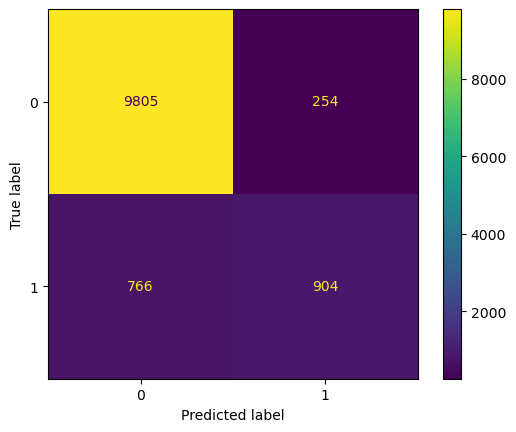

AUC in fold 2: 0.7528462609525952

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10059
           1       0.77      0.53      0.63      1670

    accuracy                           0.91     11729
   macro avg       0.85      0.75      0.79     11729
weighted avg       0.90      0.91      0.90     11729



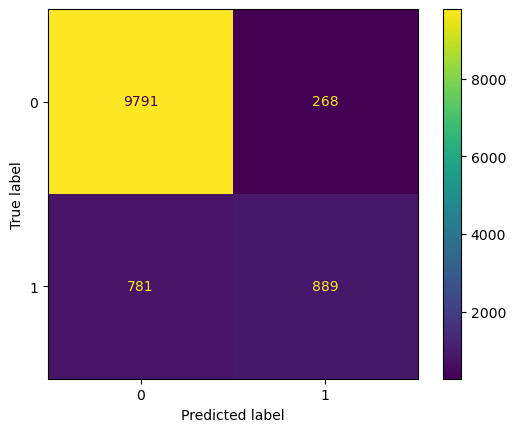

AUC in fold 3: 0.7460004536111196

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10059
           1       0.80      0.51      0.62      1670

    accuracy                           0.91     11729
   macro avg       0.86      0.75      0.79     11729
weighted avg       0.91      0.91      0.90     11729



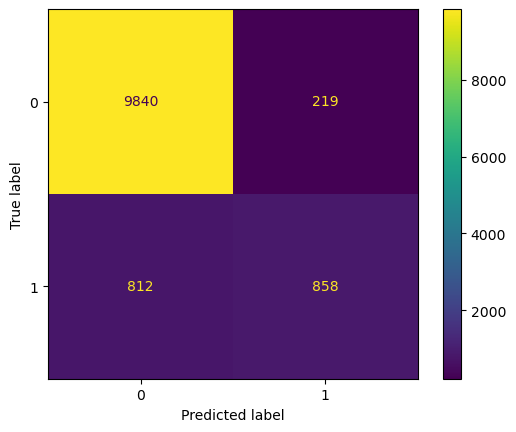

AUC in fold 4: 0.7740171014963809

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10059
           1       0.74      0.58      0.65      1670

    accuracy                           0.91     11729
   macro avg       0.84      0.77      0.80     11729
weighted avg       0.91      0.91      0.91     11729



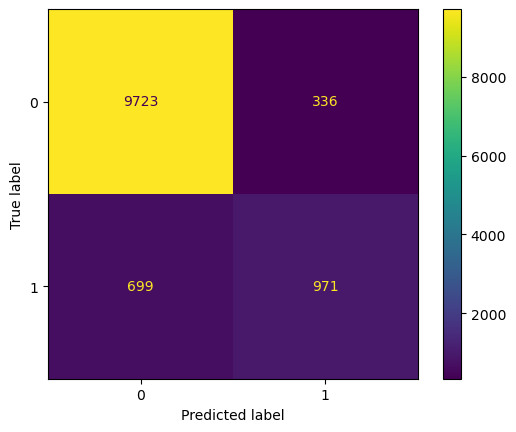

AUC in fold 5: 0.723148870764287

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10059
           1       0.77      0.47      0.58      1670

    accuracy                           0.90     11729
   macro avg       0.84      0.72      0.76     11729
weighted avg       0.90      0.90      0.89     11729



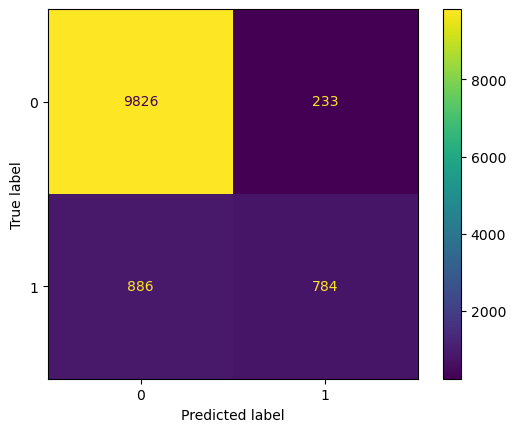

In [114]:
y_test_pred = np.zeros(len(scaled_X_test))
AUC_values = []
accu_values = []
    
for fold, (train_index, val_index) in enumerate(skf.split(scaled_X_train, y_train)):
    X_train_fold, X_val_fold = scaled_X_train[train_index], scaled_X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    SGDC.fit(X_train_fold, y_train_fold)
    
    y_val_pred_fold = SGDC.predict(X_val_fold)

    AUC_fold = roc_auc_score(y_val_fold, y_val_pred_fold)
    accu_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    
    print(f"AUC in fold {fold + 1}: {AUC_fold}\n")
    print(classification_report(y_val_fold, y_val_pred_fold))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val_fold, y_val_pred_fold)).plot()
    plt.show()

    AUC_values.append(roc_auc_score(y_val_fold, y_val_pred_fold))
    accu_values.append(accuracy_score(y_val_fold, y_val_pred_fold))

    y_test_pred_fold = SGDC.predict(scaled_X_test)
    y_test_pred += y_test_pred_fold / n_splits

In [111]:
AUC = np.mean(AUC_values)
print(f"The overall AUC is: {AUC}")

The overall AUC is: 0.7338956325345134


In [112]:
accuracy = np.mean(accu_values)
print(f"The overall accuracy is: {accuracy}")

The overall accuracy is: 0.9082956773808508


## SVC

Gridsearch:

In [46]:
from sklearn.svm import SVC

In [47]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1], 'kernel':['linear'], 'gamma':['scale', 'auto']}

In [48]:
model = SVC()

In [49]:
perform_gridsearchcv(param_grid, model)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Once the best parameters are known, now I can apply the optimal SVC, once again aplying stratification.

In [27]:
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

In [60]:
svc = SVC(C=1, gamma='scale', kernel='linear')

ROC in fold 1: 0.7494395045280748

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10059
           1       0.81      0.52      0.63      1670

    accuracy                           0.91     11729
   macro avg       0.87      0.75      0.79     11729
weighted avg       0.91      0.91      0.91     11729



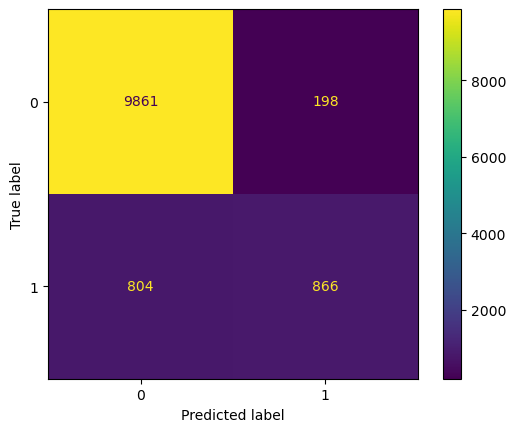

ROC in fold 2: 0.7386645438618736

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10059
           1       0.79      0.50      0.61      1670

    accuracy                           0.91     11729
   macro avg       0.86      0.74      0.78     11729
weighted avg       0.90      0.91      0.90     11729



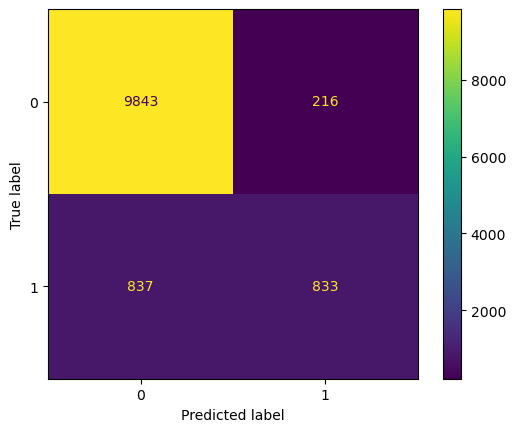

ROC in fold 3: 0.7512856184439949

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10059
           1       0.82      0.52      0.64      1670

    accuracy                           0.92     11729
   macro avg       0.87      0.75      0.79     11729
weighted avg       0.91      0.92      0.91     11729



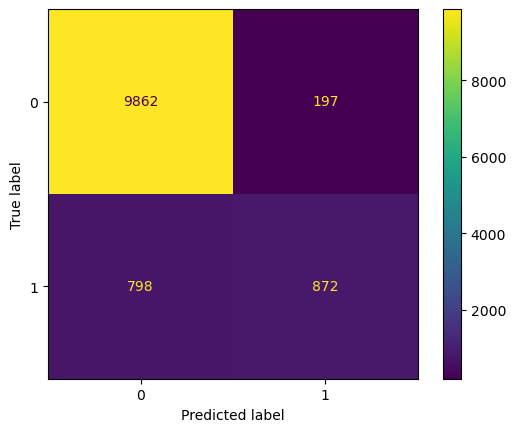

ROC in fold 4: 0.7394147880796712

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10059
           1       0.79      0.50      0.61      1670

    accuracy                           0.91     11729
   macro avg       0.86      0.74      0.78     11729
weighted avg       0.90      0.91      0.90     11729



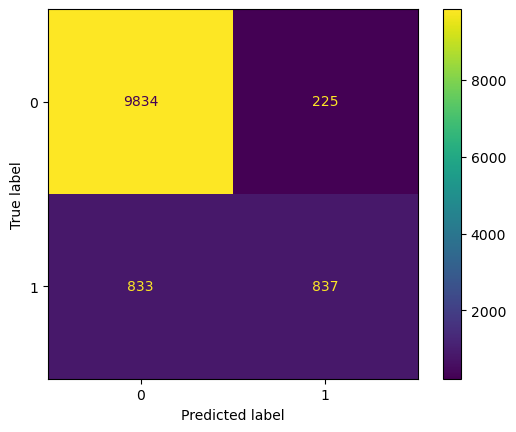

ROC in fold 5: 0.7372681121502894

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10059
           1       0.79      0.50      0.61      1670

    accuracy                           0.91     11729
   macro avg       0.86      0.74      0.78     11729
weighted avg       0.90      0.91      0.90     11729



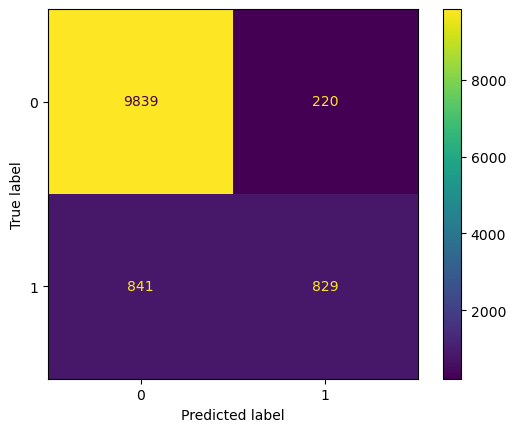

In [61]:
y_test_pred = np.zeros(len(scaled_X_test))
AUC_values = []
accu_values = []
    
for fold, (train_index, val_index) in enumerate(skf.split(scaled_X_train, y_train)):
    X_train_fold, X_val_fold = scaled_X_train[train_index], scaled_X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    svc.fit(X_train_fold, y_train_fold)
    
    y_val_pred_fold = SGDC.predict(X_val_fold)

    AUC_fold = roc_auc_score(y_val_fold, y_val_pred_fold)
    accu_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    
    print(f"ROC in fold {fold + 1}: {AUC_fold}\n")
    print(classification_report(y_val_fold, y_val_pred_fold))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val_fold, y_val_pred_fold)).plot()
    plt.show()

    ROC_values.append(roc_auc_score(y_val_fold, y_val_pred_fold))
    accu_values.append(accuracy_score(y_val_fold, y_val_pred_fold))

    y_test_pred_fold = SGDC.predict(scaled_X_test)
    y_test_pred += y_test_pred_fold / n_splits

In [62]:
AUC = np.mean(AUC_values)
print(f"The overall AUC is: {AUC}")

The overall ROC is: 0.7432145134127808


In [63]:
accuracy = np.mean(accu_values)
print(f"The overall accuracy is: {accuracy}")

The overall accuracy is: 0.9118594935629636


SVC does not show any improvement in performance over SGDC.

## Catboost (Decision Trees)

I am using Catboost with default parameters.

In [60]:
from catboost import CatBoostClassifier

In [27]:
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

In [149]:
catboost_model = CatBoostClassifier()

AUC in fold 1: 0.8553076749086321

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5030
           1       0.93      0.72      0.81       835

    accuracy                           0.95      5865
   macro avg       0.94      0.86      0.89      5865
weighted avg       0.95      0.95      0.95      5865



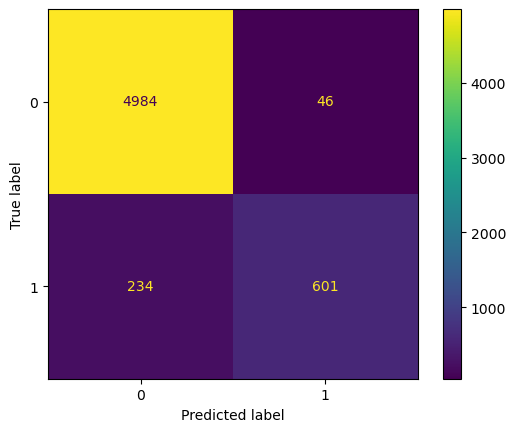

C:\Users\defco\AppData\Local\Temp\ipykernel_12772\3902088094.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance = pd.concat([feature_importance, pd.DataFrame([catboost_model.get_feature_importance()], columns=X_train.columns, index=[fold+1])])


AUC in fold 2: 0.8585927548481566

              precision    recall  f1-score   support

           0       0.96      1.00      0.97      5030
           1       0.96      0.72      0.82       835

    accuracy                           0.96      5865
   macro avg       0.96      0.86      0.90      5865
weighted avg       0.96      0.96      0.95      5865



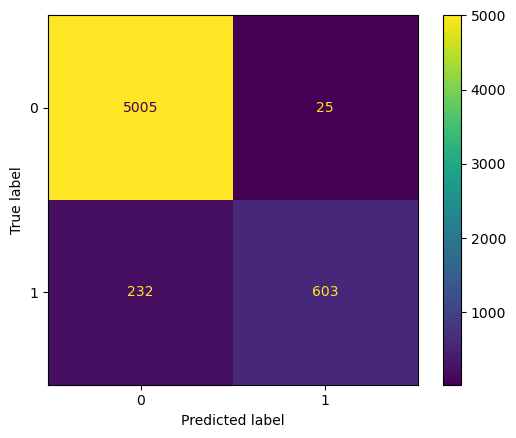

AUC in fold 3: 0.8640885227556815

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5030
           1       0.94      0.74      0.82       835

    accuracy                           0.96      5865
   macro avg       0.95      0.86      0.90      5865
weighted avg       0.95      0.96      0.95      5865



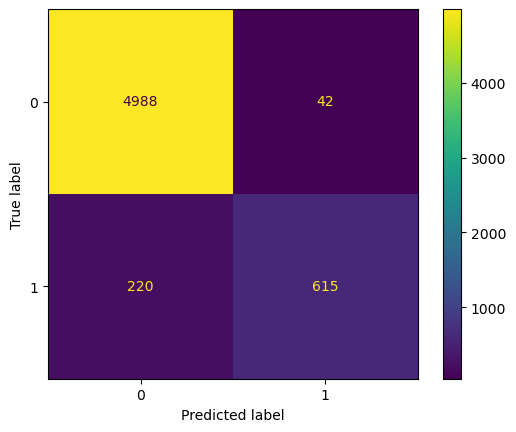

AUC in fold 4: 0.8632956750514874

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5030
           1       0.92      0.74      0.82       835

    accuracy                           0.95      5865
   macro avg       0.94      0.86      0.90      5865
weighted avg       0.95      0.95      0.95      5865



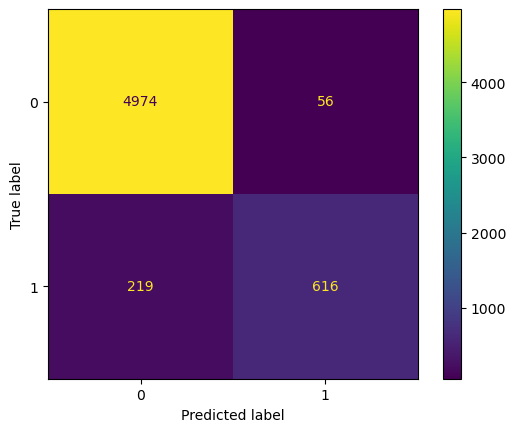

AUC in fold 5: 0.8613974833632934

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5030
           1       0.92      0.73      0.82       835

    accuracy                           0.95      5865
   macro avg       0.94      0.86      0.90      5865
weighted avg       0.95      0.95      0.95      5865



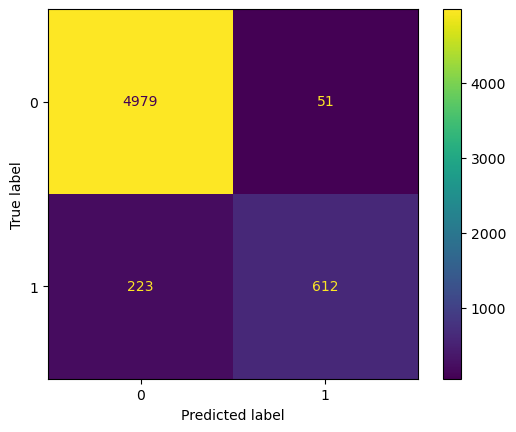

AUC in fold 6: 0.8725703494581727

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5029
           1       0.94      0.75      0.84       835

    accuracy                           0.96      5864
   macro avg       0.95      0.87      0.91      5864
weighted avg       0.96      0.96      0.96      5864



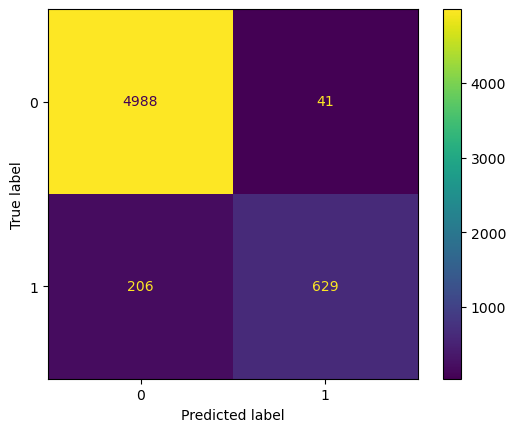

AUC in fold 7: 0.8594983824357648

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5029
           1       0.93      0.73      0.82       835

    accuracy                           0.95      5864
   macro avg       0.94      0.86      0.89      5864
weighted avg       0.95      0.95      0.95      5864



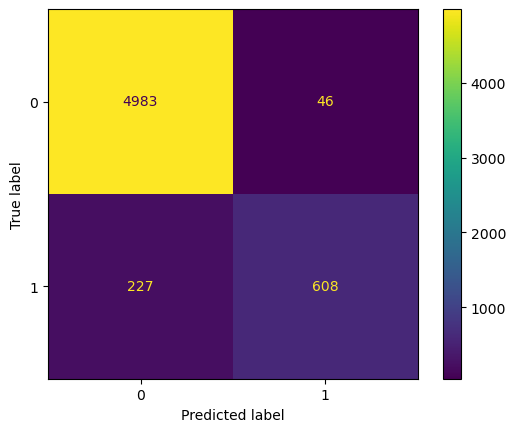

AUC in fold 8: 0.8573020195441292

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5029
           1       0.93      0.72      0.81       835

    accuracy                           0.95      5864
   macro avg       0.94      0.86      0.89      5864
weighted avg       0.95      0.95      0.95      5864



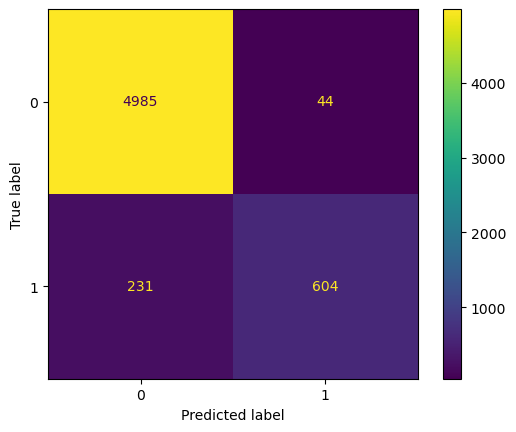

AUC in fold 9: 0.8521116446764455

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5029
           1       0.93      0.71      0.81       835

    accuracy                           0.95      5864
   macro avg       0.94      0.85      0.89      5864
weighted avg       0.95      0.95      0.95      5864



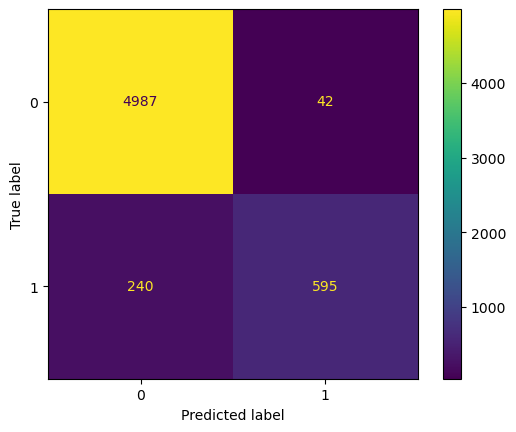

AUC in fold 10: 0.8505208711628245

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5029
           1       0.91      0.71      0.80       835

    accuracy                           0.95      5864
   macro avg       0.93      0.85      0.89      5864
weighted avg       0.95      0.95      0.95      5864



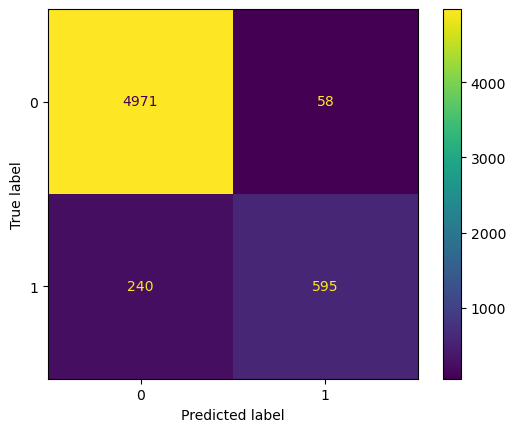

In [151]:
y_test_pred = np.zeros(len(scaled_X_test))
AUC_values = []
accu_values = []
feature_importance = pd.DataFrame(columns=X_train.columns)

for fold, (train_index, val_index) in enumerate(skf.split(scaled_X_train, y_train)):
    X_train_fold, X_val_fold = scaled_X_train[train_index], scaled_X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    catboost_model.fit(X_train_fold, y_train_fold, 
                       eval_set=(X_val_fold, y_val_fold), early_stopping_rounds=10, 
                       verbose=False)
  
    y_val_pred_fold = catboost_model.predict(X_val_fold)

    AUC_fold = roc_auc_score(y_val_fold, y_val_pred_fold)
    accu_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    
    print(f"AUC in fold {fold + 1}: {AUC_fold}\n")
    print(classification_report(y_val_fold, y_val_pred_fold))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val_fold, y_val_pred_fold)).plot()
    plt.show()

    AUC_values.append(roc_auc_score(y_val_fold, y_val_pred_fold))
    accu_values.append(accuracy_score(y_val_fold, y_val_pred_fold))

    y_test_pred_fold = catboost_model.predict(scaled_X_test)
    y_test_pred += y_test_pred_fold / n_splits
    
    feature_importance = pd.concat([feature_importance, pd.DataFrame([catboost_model.get_feature_importance()], columns=X_train.columns, index=[fold+1])])

In [58]:
AUC = np.mean(AUC_values)
print(f"The overall AUC is: {AUC}")

The overall AUC is: 0.8594685378204587


In [59]:
accuracy = np.mean(accu_values)
print(f"The overall accuracy is: {accuracy}")

The overall accuracy is: 0.9535680395297094


**Catboost gives a considerable improvement to the metrics.**

Regarding the feature importances, the catboost model calculated them in each of the previous folds and added in a data frame so their mean values can now be obtained easily:

In [177]:
feature_importance_list = np.array(np.transpose(feature_importance.describe())['mean'].sort_values(ascending=False))

In [176]:
feats = pd.DataFrame(index=X_train.columns, data=feature_importance_list, columns=['Importance'])
feats

,Importance
person_age,18.593993
person_income,16.636203
person_emp_length,13.162137
loan_amnt,11.152157
loan_int_rate,9.062125
loan_percent_income,4.663420
cb_person_cred_hist_length,4.406045
MORTGAGE,3.027284
OTHER,2.790851
OWN,2.689282


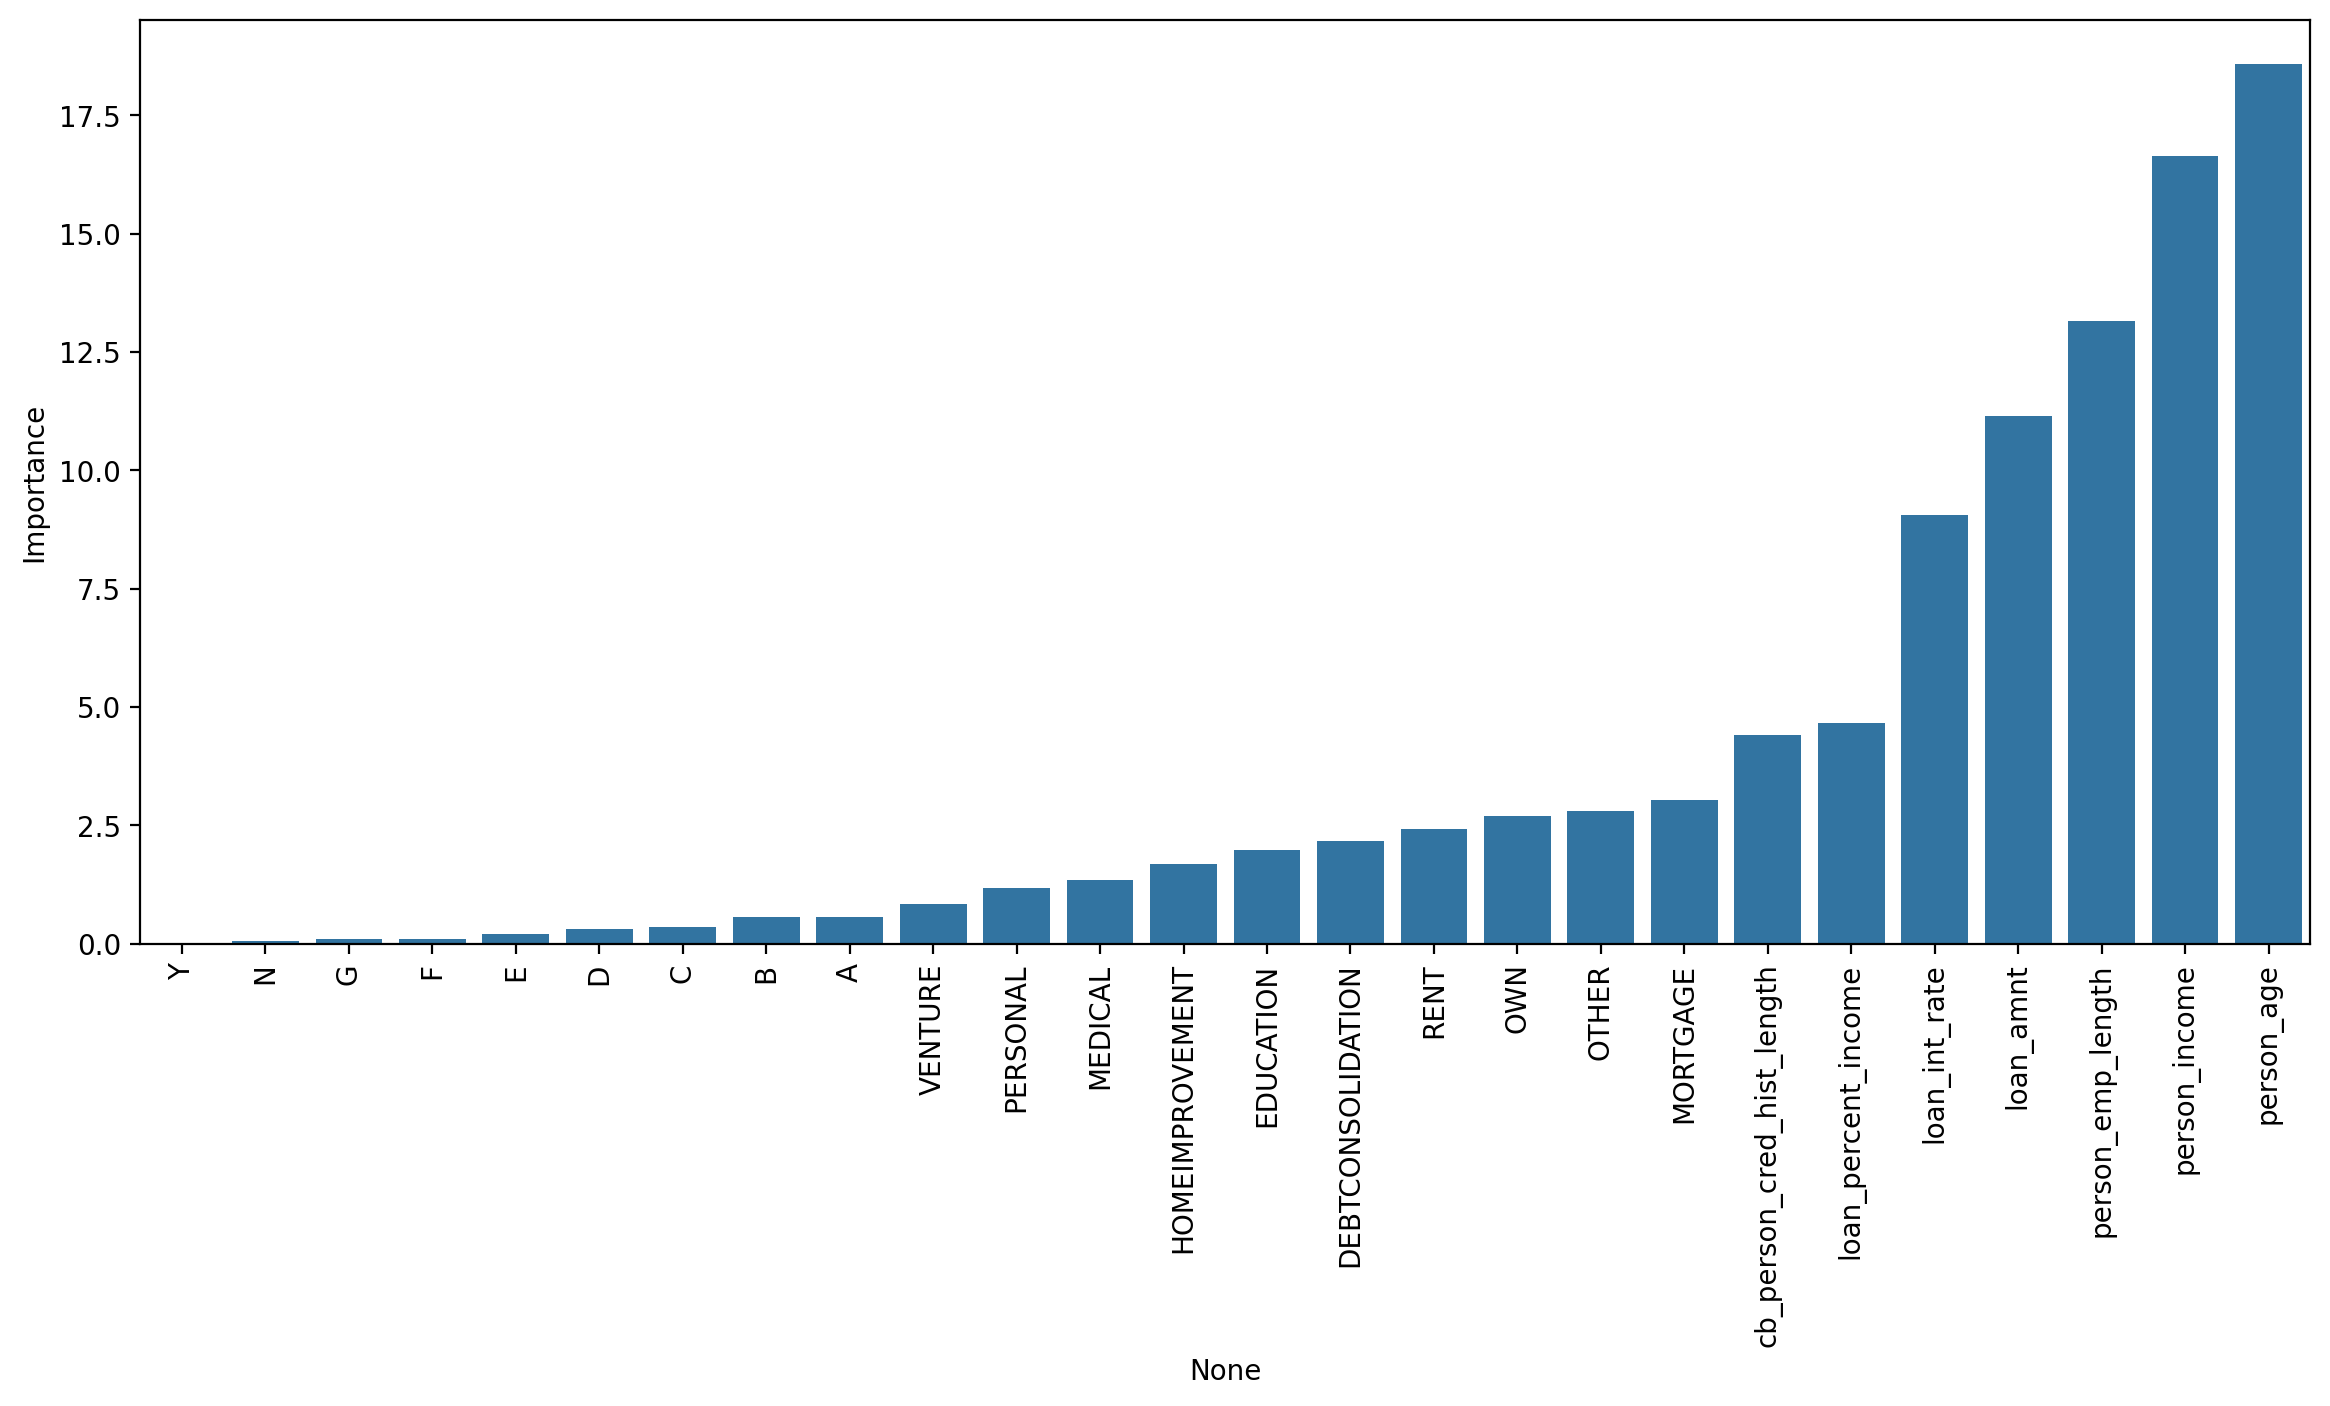

In [179]:
imp_feats = feats[feats['Importance'] > 0]
imp_feats = imp_feats.sort_values("Importance")

plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90);

# POSSIBLE IMPROVEMENTS

I am removing the outliers present in 'person_income'.

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [117]:
index_drop = df_train[df_train['person_income']>0.5e6].index
df_train_out = df_train.drop(index_drop, axis=0)
index_drop = df_test[df_test['person_income']>0.5e6].index
df_test_out = df_test.drop(index_drop, axis=0)

In [118]:
df_train_out_encoded = encode(df_train)
df_test_out_encoded = encode(df_test)

In [119]:
X_train_out = df_train_out_encoded.drop('loan_status', axis=1)
y_train_out = df_train_out_encoded['loan_status']
X_test_out = df_test_out_encoded

In [120]:
scaled_X_train_out = scaler.fit_transform(X_train_out)
scaled_X_test_out = scaler.transform(X_test_out)

In [121]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

In [122]:
SGDC = SGDClassifier(alpha=0.0001, l1_ratio=0.1, loss='log_loss', penalty='elasticnet')

ROC in fold 1: 0.7672117143583398

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10059
           1       0.80      0.56      0.66      1670

    accuracy                           0.92     11729
   macro avg       0.86      0.77      0.80     11729
weighted avg       0.91      0.92      0.91     11729



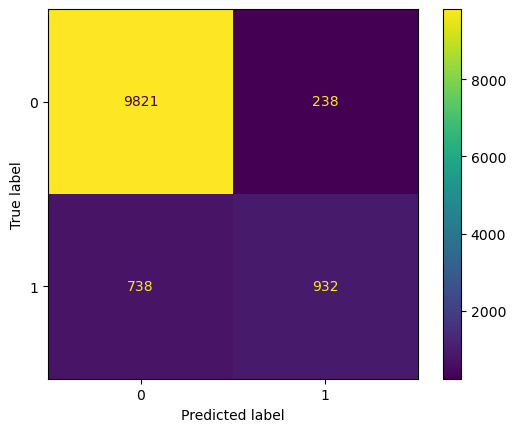

ROC in fold 2: 0.7140084281184127

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10059
           1       0.80      0.45      0.57      1670

    accuracy                           0.91     11729
   macro avg       0.86      0.71      0.76     11729
weighted avg       0.90      0.91      0.89     11729



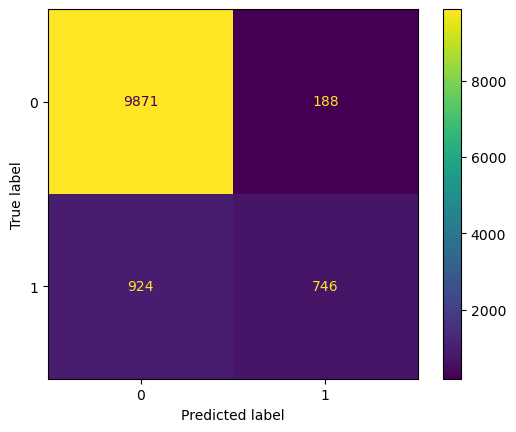

ROC in fold 3: 0.7632709528750432

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10059
           1       0.79      0.55      0.65      1670

    accuracy                           0.92     11729
   macro avg       0.86      0.76      0.80     11729
weighted avg       0.91      0.92      0.91     11729



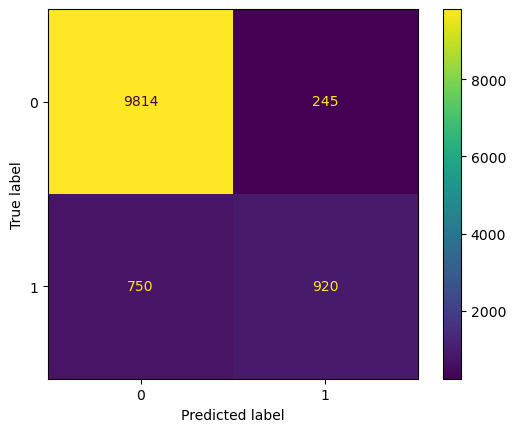

ROC in fold 4: 0.7574933640026834

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10059
           1       0.75      0.54      0.63      1670

    accuracy                           0.91     11729
   macro avg       0.84      0.76      0.79     11729
weighted avg       0.90      0.91      0.90     11729



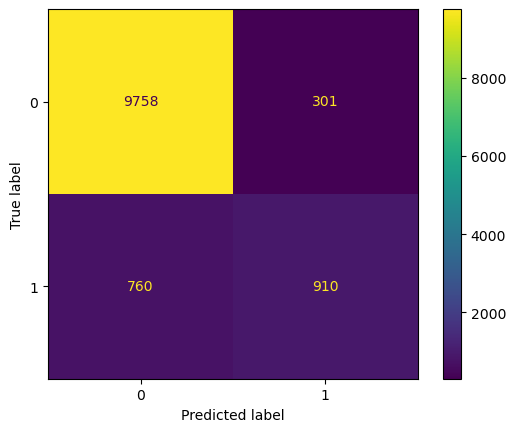

ROC in fold 5: 0.7357237210636882

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10059
           1       0.78      0.49      0.61      1670

    accuracy                           0.91     11729
   macro avg       0.85      0.74      0.78     11729
weighted avg       0.90      0.91      0.90     11729



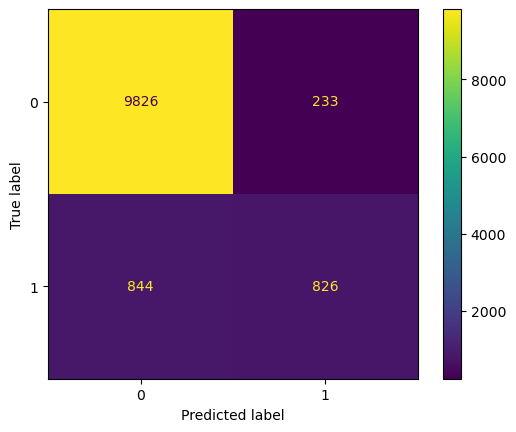

In [129]:
y_test_pred = np.zeros(len(scaled_X_test_out))
AUC_values = []
accu_values = []
    
for fold, (train_index, val_index) in enumerate(skf.split(scaled_X_train_out, y_train_out)):
    X_train_fold, X_val_fold = scaled_X_train_out[train_index], scaled_X_train_out[val_index]
    y_train_fold, y_val_fold = y_train_out[train_index], y_train_out[val_index]
    
    SGDC.fit(X_train_fold, y_train_fold) # Añadir early_stopping y monitorear error con eval_set y eval_metric
    
    y_val_pred_fold = SGDC.predict(X_val_fold)

    AUC_fold = roc_auc_score(y_val_fold, y_val_pred_fold)
    accu_fold = accuracy_score(y_val_fold, y_val_pred_fold)
    
    print(f"AUC in fold {fold + 1}: {AUC_fold}\n")
    print(classification_report(y_val_fold, y_val_pred_fold))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val_fold, y_val_pred_fold)).plot()
    plt.show()

    AUC_values.append(roc_auc_score(y_val_fold, y_val_pred_fold))
    accu_values.append(accuracy_score(y_val_fold, y_val_pred_fold))

    y_test_pred_fold = SGDC.predict(scaled_X_test_out)
    y_test_pred += y_test_pred_fold / n_splits

In [130]:
AUC = np.mean(AUC_values)
print(f"The overall AUC is: {AUC}")

The overall ROC is: 0.7475416360836334


accuracy = np.mean(accu_values)
print(f"The overall accuracy is: {accuracy}")

**Removing outliers does not show any improvement on the performance of the model.**

# SUBMISSION

In [53]:
def submit(predictions):
    df_sub['loan_status'] = predictions
    df_sub.to_csv('submission.csv', index = False)
    print(f"The file contains the following: \n\n{pd.read_csv('submission.csv')}")

In [54]:
submit(y_test_pred)

The file contains the following: 

          id  loan_status
0      58645          1.0
1      58646          0.0
2      58647          1.0
3      58648          0.0
4      58649          0.0
...      ...          ...
39093  97738          0.0
39094  97739          0.0
39095  97740          0.0
39096  97741          0.0
39097  97742          1.0

[39098 rows x 2 columns]


# FINAL CHECKS

<Axes: xlabel='loan_status', ylabel='Count'>

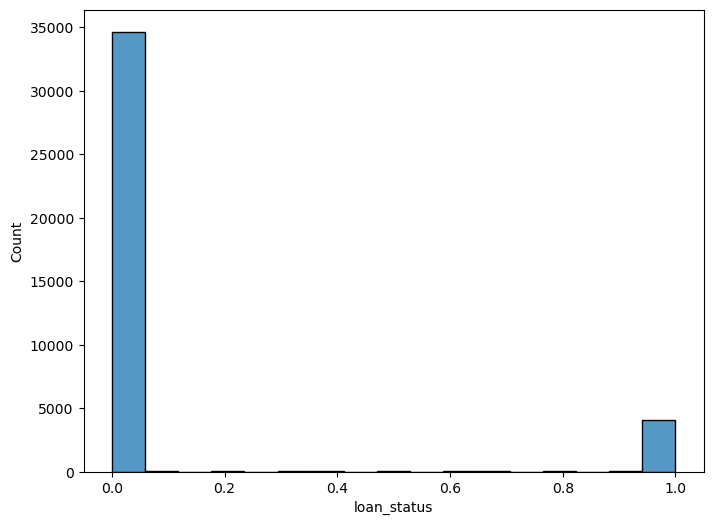

In [180]:
plt.figure(figsize=(8,6))
sns.histplot(df_sub['loan_status'])